In [3]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from netCDF4 import num2date
#import func as f
import pandas as pd
from scipy.interpolate import BSpline

## Copy for changing path for files local mac

In [74]:
path = '/Users/johannemehren/Desktop/filer/'
era5 = xr.open_dataset(path + 'FULL-ERA5.tp.monzonmean.2000-2018.nc4')
obs = xr.open_dataset(path + 'GPS-RO__CP_LR_5x5_2007-2018.nc')
erai = xr.open_dataset(path + 'erai_latlon_regrid_2006-2018_3030.nc')

#obs_lonav = xr.open_dataset('GPS-RO_cdo_zonmean.nc')
era5_latlon = xr.open_dataset(path + 'FULL-ERA5.monthmean.2007-2018.concat_new.nc')

#obs_monmean = xr.open_dataset('GPS-RO_CP_monmean_2007-2017.nc')

#obs_old = xr.open_dataset('GPS-RO__LR-CP__gridded_ALL_MISSIONS_2002-2018.nc', decode_times=False)


era5_regrid = xr.open_dataset(path + 'gridfile_test.nc')
erai_regrid = xr.open_dataset(path + 'erai_regrid_5x5.nc')

In [93]:
era5_regrid.history

'Wed Jan 22 11:31:46 2020: cdo remapbil,gridfile.txt FULL-ERA5.monthmean.2007-2018.concat_new.nc gridfile_test.nc\nMon Jan 13 16:48:29 2020: ncrcat FULL-ERA5.tp.monthmean.2007-2010.nc4 FULL-ERA5.tp.monthmean.2010-2018.nc test.nc\nGenerated from the ERA5 ECMWF 6-hourly archive on model levels\ncreated on 07-10-2019 15:18 at LMD \n(Bernard Legras: legras@lmd.ens.fr)\ngenerating code: SRIP-TTL4N.py'

In [14]:
## Prøver gps-ro fila med grov oppløsning fra 2002-2018
#ds_obs_old = obs_old.sel(lat=slice(-20,20))
#ds_obs_old['time'] = pd.date_range('2002-01-01', '2018-12-31', freq='M')
#obs_lonav_old = ds_obs_old.CP_T[:,:,:].mean(axis=(1,2))

In [38]:
## Vanlige 5x5 grid gpsro
obs_wa = obs.resample(time='M').mean()
ds_obs = obs_wa.sel(lat=slice(-20,20))
obs_mean = ds_obs.mean(axis=(1,2))
obs_mean['time'] = ds_obs.time
obs_mean

<xarray.Dataset>
Dimensions:  (time: 144)
Coordinates:
  * time     (time) datetime64[ns] 2007-01-31 2007-02-28 ... 2018-12-31
Data variables:
    CP_T     (time) float32 190.36124 190.4264 191.04292 ... 190.86308 190.54231
    CP_z     (time) float32 17.576189 17.54867 17.34725 ... 17.406546 17.607016
    LR_T     (time) float32 191.0509 191.12128 191.66704 ... 191.44356 191.29237
    LR_z     (time) float32 17.023983 16.95944 16.81543 ... 16.905666 16.976511

In [16]:
## prøver cdo zonal mean, ikke brukt senere
#obs_lonav_mon = obs_lonav.resample(time='M').mean()
#obs_lonav_mean = obs_lonav_mon.CP_T[:,:].mean(axis=(1))


In [41]:
## Vanlig zonal mean ERA5 data
ds_era5 = era5.sel(lat=slice(-20,20),time = slice('2007-01-01', '2018-12-01'))
era5_mean = ds_era5.ctpt[:,:].mean(axis=1)


In [9]:
## ERA5 latlon data for sammenligning når jeg gjør zonal mean av det
ds_latlon = era5_latlon.sel(lat=slice(-20,20), time = slice('2007-01-01', '2018-12-01'))
era5_latlon_mean = ds_latlon.ctpt[:,:,:].mean(axis=(1,2))

In [87]:
## ERA-I data, zonal mean 
ds_erai = erai.sel(lat = slice(-20,20), time = slice('2007-01-01', '2018-12-31'))
erai_mean = ds_erai.ctpt[:,:,:].mean(axis=(1,2))

In [88]:
diff1_zon = era5_mean - obs_mean.CP_T.values
diff2_zon = erai_mean - obs_mean.CP_T.values

In [20]:
## gps-ro fil med monthly means, 2007-2017
#ds_obs_monmean = obs_monmean.sel(lat=slice(-20,20))
#obs_lonav_monmean = ds_obs_monmean.CP_T[:,:,:].mean(axis=(1,2))
#obs_lonav_monmean['time'] = era5_latlon_mean.time[0:132]

In [12]:
# for å sjekke at tidskoordinaten er lik for gpsro og era5, bruker tiden fra era5
#data_set=xr.Dataset( coords={'time': diff.time})
#data_set['CP_T'] = (['time'],obs_mean)


In [28]:
## teste om gridfile gir riktig svar, ERA5
era5_grid_trop = era5_regrid.sel(lat=slice(-20,20))
era5_grid_am = era5_grid_trop.mean(axis=(1,2))
era5_grid_am['time'] = era5_grid_trop.time


In [71]:
## gridfil for ERA-I
erai_grid_trop = erai_regrid.sel(lat=slice(-20,20), time=slice('2007-01-01', '2018-12-31'))
erai_grid_am = erai_grid_trop.mean(axis=(1,2))
erai_grid_am['time'] = erai_grid_trop.time


<xarray.Dataset>
Dimensions:       (lat: 9, lon: 72, time: 144)
Coordinates:
  * time          (time) datetime64[ns] 2007-01-16T09:00:00 ... 2018-12-16T09:00:00
  * lon           (lon) float64 -177.5 -172.5 -167.5 ... 167.5 172.5 177.5
  * lat           (lat) float64 -20.0 -15.0 -10.0 -5.0 0.0 5.0 10.0 15.0 20.0
Data variables:
    tpp           (time, lat, lon) float32 ...
    tpt           (time, lat, lon) float32 ...
    tpz           (time, lat, lon) float32 ...
    tpp2          (time, lat, lon) float32 ...
    tpt2          (time, lat, lon) float32 ...
    tpz2          (time, lat, lon) float32 ...
    ctpp          (time, lat, lon) float32 ...
    ctpt          (time, lat, lon) float32 ...
    ctpz          (time, lat, lon) float32 ...
    zlrp          (time, lat, lon) float32 ...
    zlrt          (time, lat, lon) float32 ...
    zlrz          (time, lat, lon) float32 ...
    splinezlrp    (time, lat, lon) float32 ...
    splinezlrt    (time, lat, lon) float32 ...
    splinezlrz    (time, lat, lon) float32 ...
    dthetadzminp  (time, lat, lon) float32 ...
    dthetadzmint  (time, lat, lon) float32 ...
    dthetadzminz  (time, lat, lon) float32 ...
    cpsmr         (time, lat, lon) float32 ...
    occ2nd        (time, lat, lon) float64 ...
    tpp2mtpp      (time, lat, lon) float32 ...
    tpt2mtpt      (time, lat, lon) float32 ...
    tpz2mtpz      (time, lat, lon) float32 ...
    zlrsmr        (time, lat, lon) float32 ...
Attributes:
    CDI:                        Climate Data Interface version 1.9.6 (http://...
    Conventions:                CF-1.6
    history:                    Wed Jan 22 12:16:51 2020: cdo remapbil,gridfi...
    title:                      ERA-Interim tropopause pressure, temperature,...
    NCO:                        netCDF Operators version 4.7.9 (Homepage = ht...
    history_of_appended_files:  Mon Sep 30 14:13:22 2019: Appended file tp-19...
    CDO:                        Climate Data Operators version 1.9.6 (http://...

In [23]:
## plotte era5 mot obs som tidsserie, ikke diff
plt.figure(figsize=(10,8))
era5_mean.ctpt.plot()
#obs_lonav_old.plot()
#data_set.CP_T.plot()
#obs_lonav_monmean.plot()
#obs_mean.plot()
era5_grid_am.ctpt.plot()
#plt.xlim('2007', '2009')

AttributeError: 'DataArray' object has no attribute 'ctpt'

<Figure size 720x576 with 0 Axes>

In [16]:
plt.figure(figsize=(10,8))
ddd  = era5_mean[24:] - obs_lonav_old.values
ddd.plot()
ddd.rolling(time=5).mean().plot(linewidth=3)
plt.plot(era5_mean.time, np.zeros(len(era5_mean.time)))
plt.ylim(-1.2, 1.2)

NameError: name 'obs_lonav_old' is not defined

<Figure size 720x576 with 0 Axes>

In [17]:
## xarray and naw, all the same 
## make np.array xarray object to plot

#diff = era5_mean[84:] - obs_mean.values
#diff3 = era5_xarray_aw - gpsro_xarray_aw
diff_grid = era5_grid_am.ctpt - obs_mean.CP_T.values
diff_grid_lrt = era5_grid_am.tpt - obs_mean.LR_T.values

diff_cpt_grid_erai = erai_grid_am.ctpt - obs_mean.CP_T.values
diff_lrt_grid_erai = erai_grid_am.tpt - obs_mean.LR_T.values
#diff_new = np.array(era5_mean) - np.array(data_set.CP_T)
#era5_mean
#d = era5_latlon_mean - obs_mean.values
#obs_mean.values
#data_set=xr.Dataset( coords={'time': diff.time})
#data_set['xarray'] = (['time'],diff3[0,:])

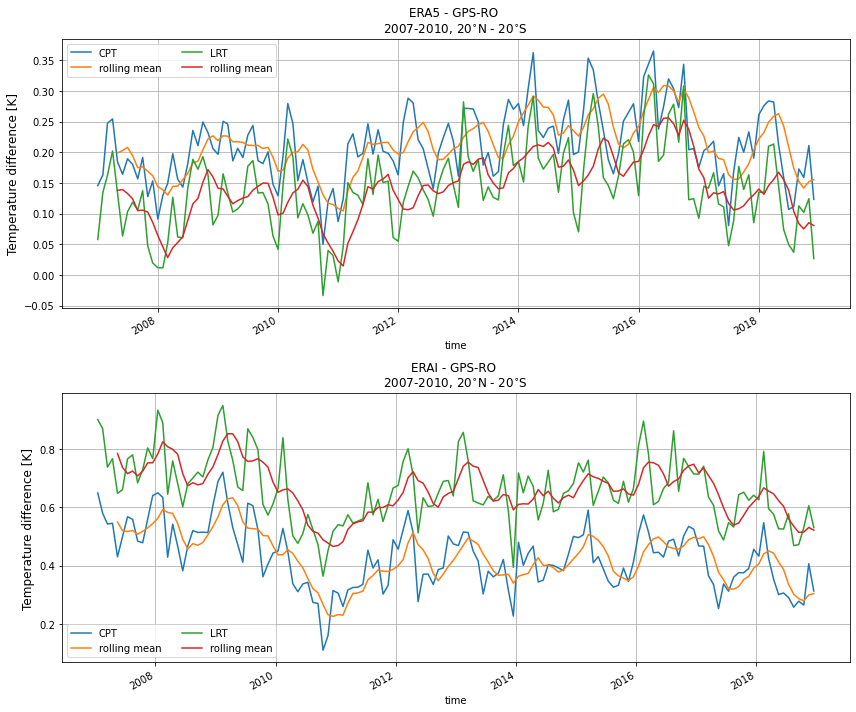

In [30]:
fig, axs = plt.subplots(2,1,figsize=(12,10))
#diff.plot(label='ERA5 1x1 - gpsro')
#diff.rolling(time=5).mean().plot()
#d.plot()
#axs[0].plot(diff.time, np.zeros(len(diff.time)))
diff_grid.plot(ax= axs[0],label='CPT')
diff_grid.rolling(time=5).mean().plot(ax=axs[0], label='rolling mean')
diff_grid_lrt.plot(ax=axs[0],label = 'LRT')
diff_grid_lrt.rolling(time=5).mean().plot(ax=axs[0], label='rolling mean')
axs[0].set_title('ERA5 - GPS-RO \n2007-2010, 20$^{\circ}$N - 20$^{\circ}$S')

diff_cpt_grid_erai.plot(ax=axs[1], label = 'CPT')
diff_cpt_grid_erai.rolling(time=5).mean().plot(ax=axs[1], label='rolling mean')
diff_lrt_grid_erai.plot(ax=axs[1], label = 'LRT')
diff_lrt_grid_erai.rolling(time=5).mean().plot(ax=axs[1], label = 'rolling mean')
axs[1].set_title('ERAI - GPS-RO \n2007-2010, 20$^{\circ}$N - 20$^{\circ}$S')

#plt.ylim(-0.5,0.5)

for ax in axs:
    ax.legend(ncol=2)
    #ax.set_xlim('2007','2011')
    ax.grid()
    ax.set_ylabel('Temperature difference [K]', fontsize=12)
    
plt.tight_layout()

#fig.savefig('diff_era5-gpsro_erai-gpsro_2007_2010.pdf')
#data_set.xarray.plot()
#data_set.xarray.rolling(time=10).mean().plot()

In [65]:
col1 = 'darkblue'
col2 = 'cornflowerblue'

col3 = 'darkgreen'
col4 = 'limegreen'

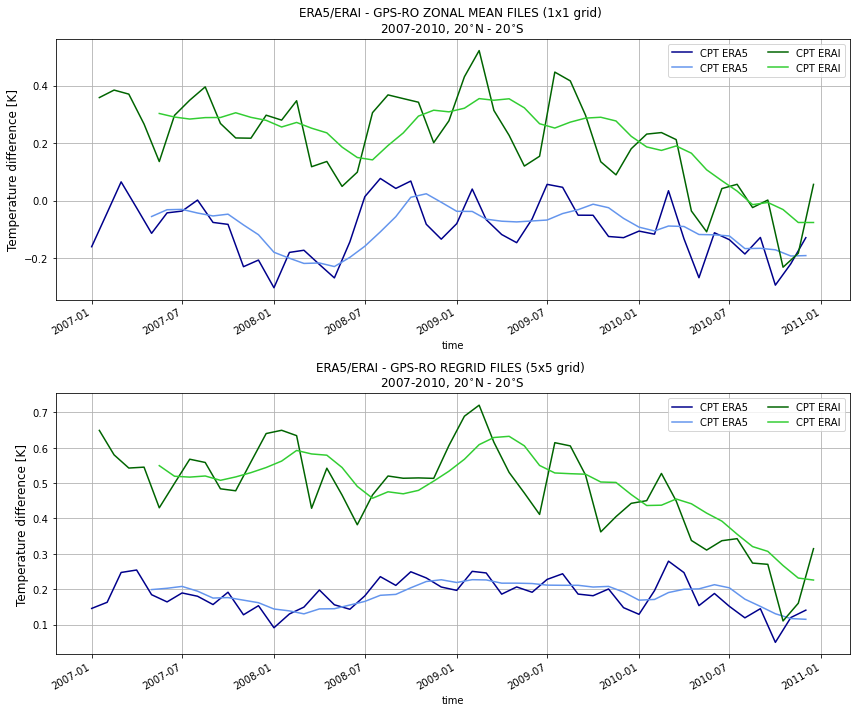

In [90]:
fig, axs = plt.subplots(2,1,figsize=(12,10))
#diff.plot(label='ERA5 1x1 - gpsro')
#diff.rolling(time=5).mean().plot()
#d.plot()
#axs[0].plot(diff.time, np.zeros(len(diff.time)))
diff1_zon[0:48].plot(ax= axs[0],label='CPT ERA5', color = col1 )
diff1_zon[0:48].rolling(time=5).mean().plot(ax=axs[0], label='CPT ERA5', color=col2)
diff2_zon[0:48].plot(ax=axs[0],label = 'CPT ERAI', color = col3)
diff2_zon[0:48].rolling(time=5).mean().plot(ax=axs[0], label='CPT ERAI', color = col4)
axs[0].set_title('ERA5/ERAI - GPS-RO ZONAL MEAN FILES (1x1 grid) \n2007-2010, 20$^{\circ}$N - 20$^{\circ}$S')


diff_grid[0:48].plot(ax= axs[1],label='CPT ERA5', color = col1)
diff_grid[0:48].rolling(time=5).mean().plot(ax=axs[1], label='CPT ERA5', color = col2)
diff_cpt_grid_erai[0:48].plot(ax=axs[1], label = 'CPT ERAI', color = col3)
diff_cpt_grid_erai[0:48].rolling(time=5).mean().plot(ax=axs[1], label='CPT ERAI', color = col4)
axs[1].set_title('ERA5/ERAI - GPS-RO REGRID FILES (5x5 grid) \n2007-2010, 20$^{\circ}$N - 20$^{\circ}$S')

#plt.ylim(-0.5,0.5)

for ax in axs:
    ax.legend(ncol=2)
    ax.grid()
    ax.set_ylabel('Temperature difference [K]', fontsize=12)
    
plt.tight_layout()

#plt.savefig('difference_cpt_regrid_zonal_era5erai-gpsro.pdf')

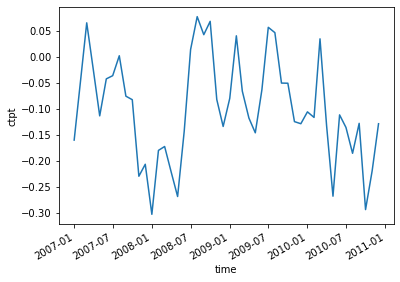

In [61]:
diff1_zon[0:48].plot()

In [35]:
#diff4 = erai_mean - obs_mean.values
#diff5 = erai_xarray_aw - gpsro_xarray_aw
diff6 = era5_grid_am - obs_lonav_old.values
diff6.rolling(time=10).mean().plot()
#dsxr = xr.Dataset(coords={'time':diff4.time})
#dsxr['xarray']  = (['time'], diff5[0,:])
diff6.plot()

NameError: name 'obs_lonav_old' is not defined

(732677.0, 734138.0)

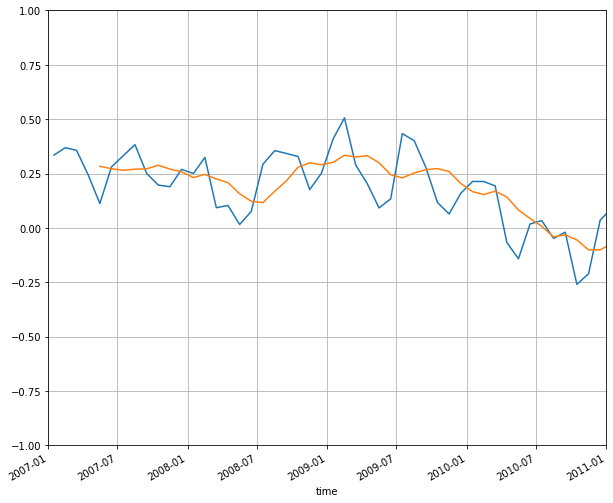

In [155]:
plt.figure(figsize=(10,8))
diff4.plot()
diff4.rolling(time=5).mean().plot()
plt.grid()
plt.ylim(-1,1)
plt.xlim('2007', '2011')

In [53]:
path = '/uio/hume/student-u62/johanmeh/Documents/Master/Data_from_Susann/new_data/aw/'
nco_era5 = xr.open_dataset(path+'ERA5_lat_aw.nc')
nco_gpsro = xr.open_dataset(path + 'GPS-RO_lat_averaged.nc')
cdo_era5 = xr.open_dataset(path + 'ERA5_lat_cdo_aw.nc')
cdo_gpsro = xr.open_dataset(path + 'GPS-RO_cdo_aw.nc')
nco_erai = xr.open_dataset(path + 'ERAI_lat_aw.nc')

In [54]:
nco_era5_sel = nco_era5.ctpt.sel(time=slice('2007-01-01', '2018-12-01'))
nco_gpsro_sel = nco_gpsro.resample(time='M').mean()

cdo_era5_sel = cdo_era5.ctpt.sel(time=slice('2007-01-01', '2018-12-01'))
cdo_gpsro_sel = cdo_gpsro.CP_T.resample(time='M').mean()

nco_erai_sel = nco_erai.ctpt.sel(time=slice('2007-01-01', '2018-12-31'))


In [ ]:
nco_era5_sel.plot()

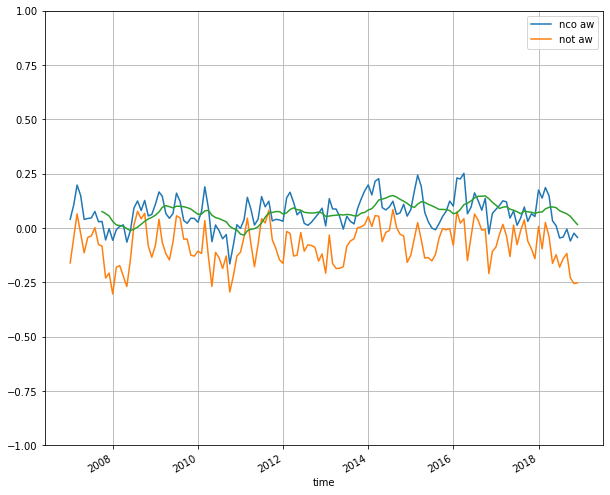

In [59]:
plt.figure(figsize=(10,8))

diff2 = nco_era5_sel - nco_gpsro_sel.CP_T.values
diff2.plot(label='nco aw')
diff.plot(label='not aw')
diff2.rolling(time=10).mean().plot()
plt.grid()
plt.ylim(-1,1)
#plt.xlim('2007', '2011')
plt.legend()

(-1, 1)

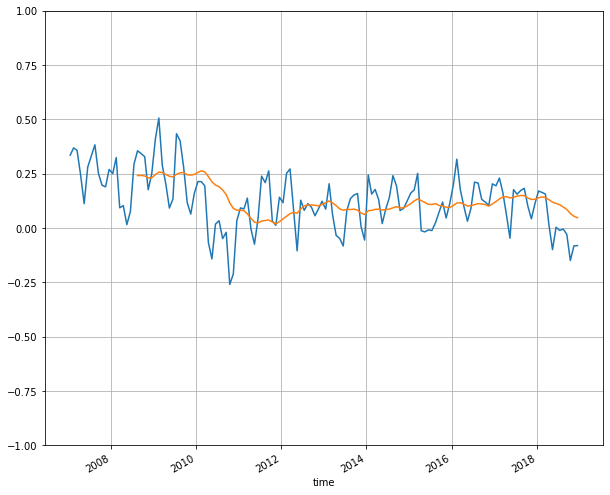

In [147]:
plt.figure(figsize=(10,8))
diff8 = nco_erai_sel - nco_gpsro_sel.CP_T.values
diff8.plot()
diff8.rolling(time=20).mean().plot()

plt.grid()
plt.ylim(-1,1)
#plt.plot(yr, np.array(cdo_era5_sel[:,0,0]) - np.array(cdo_gpsro_sel[:,0,0]))